In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from __future__ import print_function

import datetime
import pandas as pd
import numpy as np
from dateutil import parser as dtparser

from utils.datafetch import *
from utils.vectorized_funs import *
from utils.datapipe import *
from utils.kerasutil import *
from utils import scenarioa
from utils import scenariob
from FintechCapstone import FinCapstone

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

Using TensorFlow backend.


In [4]:
%matplotlib inline

plt.style.use('seaborn-whitegrid')
date_from = '2009-01-01'
date_to = '2017-03-01'
timespan = {
    "short_term": [1, 5]
    ,"medium_term": [40]
    ,"long_term": [90]
}

#trial = FinCapstone(ticker_list=["GLW","HIMX","GLUU"], scenario="scenarioa", ticker_list_samplesize=4, timespan=timespan, date_from=date_from, reset_status=True)
#trial = FinCapstone(scenario="scenarioa", ticker_list=["ZHNE","BSFT","AERO","MATR","ITMSF","FIT","TIPT","OLBK","QADA","ATTU","LGF","STX","TPCS","GSAT","ZNGA","GLW","HIMX","YHOO", "NWSA","JAKK","GLUU","AMZN", "AAPL", "EBAY", "GOOG", "DIS", "NFLX", "EA", "TWTR", "FB", "TTWO", "PXLW", "UBI"], ticker_list_samplesize=4, timespan=timespan, date_from=date_from, reset_status=True)
trial = FinCapstone(scenario="scenariob",ticker_list_samplesize=4000, timespan=timespan, date_from=date_from, reset_status=False)

#trial.run_initial_dataload()
#trial.feature_engineering()

nasdaq has 3188 tickers.


Final dataset has 3188 records
(OK) Final dataset has 3188 distinct tickers


In [5]:
#trial.run_initial_dataload()

In [6]:
#trial.feature_engineering()

In [7]:
X_train, y_train, X_test, y_test = scenariob.prepare_problemspace(trial.valid_ticker_list(), trial.train_from, trial.train_until, trial.test_from, normalize=True, return_type="numpy")

/home/pedro/jupyternb/FintechCapstone/FintechCapstone.py:125: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ticker_list = ticker_list[~(self.featureengineer_status_df["status"] == "NOK")]


In [8]:
X_train.shape

(1564, 29, 3049)

In [9]:
y_train.shape

(1564, 12196)

In [10]:
X_test.shape

(346, 29, 3049)

In [11]:
y_test.shape

(346, 12196)

In [12]:
np.isnan(X_train).sum()

0

In [13]:
np.isnan(y_train).sum()

0

In [14]:
X_final, pca = scenariob.dim_reduction(X_train, 900)

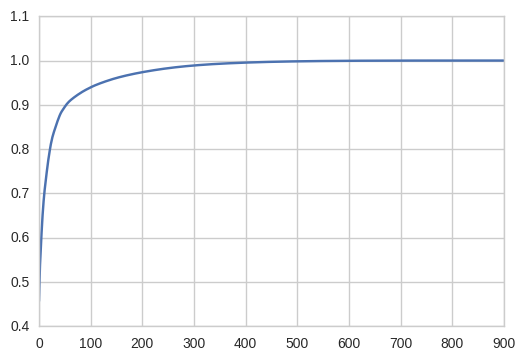

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [16]:
np.cumsum(pca.explained_variance_ratio_)[-1]

1.0000000000000033

In [20]:
model = scenariob.create_model(len(trial.valid_ticker_list()), X_final.shape[1])

/home/pedro/jupyternb/FintechCapstone/FintechCapstone.py:125: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ticker_list = ticker_list[~(self.featureengineer_status_df["status"] == "NOK")]


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
zero_padding2d_13 (ZeroPaddi (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
zero_padding2d_14 (ZeroPaddi (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 16, 16, 128)       0         
__________

In [28]:
model.fit(X_final, y_train, batch_size=64, epochs=100)

Epoch 1/100
1564/1564 [==============================] - 4s - loss: 1.9040     
Epoch 2/100
1564/1564 [==============================] - 4s - loss: 1.9039     
Epoch 3/100
1564/1564 [==============================] - 4s - loss: 1.9040     
Epoch 4/100
1564/1564 [==============================] - 4s - loss: 1.9039     
Epoch 5/100
1564/1564 [==============================] - 4s - loss: 1.9039     
Epoch 6/100
1564/1564 [==============================] - 4s - loss: 1.9038     
Epoch 7/100
1564/1564 [==============================] - 4s - loss: 1.9037     
Epoch 8/100
1564/1564 [==============================] - 4s - loss: 1.9037     
Epoch 9/100
1564/1564 [==============================] - 4s - loss: 1.9037     
Epoch 10/100
1564/1564 [==============================] - 4s - loss: 1.9036     
Epoch 11/100
1564/1564 [==============================] - 4s - loss: 1.9035     
Epoch 12/100
1564/1564 [==============================] - 4s - loss: 1.9035     
Epoch 13/100
1564/1564 [=============

In [25]:

Xt_final, pca = scenariob.dim_reduction(X_test, 900, pca)

In [26]:
y_pred = model.predict(Xt_final)

In [27]:
model.evaluate(Xt_final, y_test)

320/346 [==========================>...] - ETA: 0s

2.1560105118265298

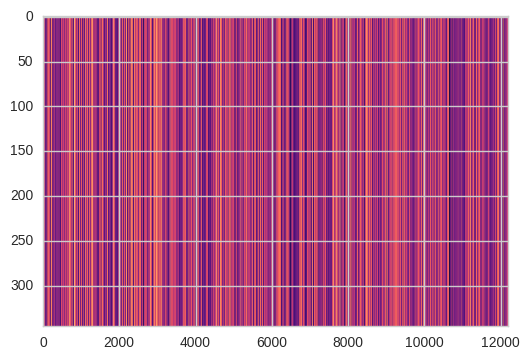

In [66]:
plt.imshow(y_pred, aspect="auto", cmap="magma")